In [1]:
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
from sklearn.metrics import f1_score,accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import *
from sklearn.compose import ColumnTransformer

In [2]:
data = read_csv(r"C:\Users\FAISAL-PC\OneDrive\Desktop\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

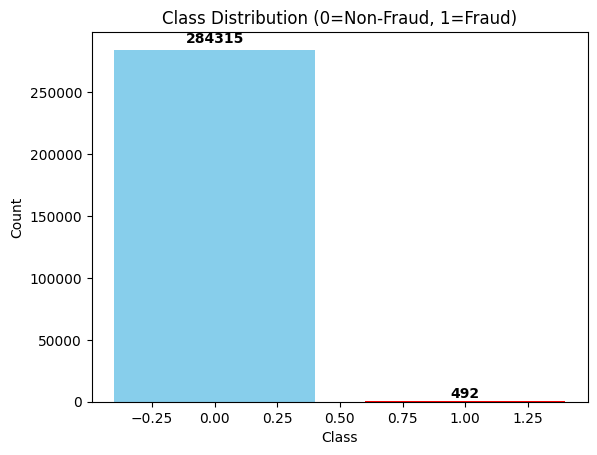

In [5]:
class_counts = data['Class'].value_counts().sort_index()

bar(class_counts.index, class_counts.values, color=['skyblue','red'])
title("Class Distribution (0=Non-Fraud, 1=Fraud)")
xlabel("Class")
ylabel("Count")

for i, v in enumerate(class_counts.values):
    text(i, v + (0.01 * v), str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

show()

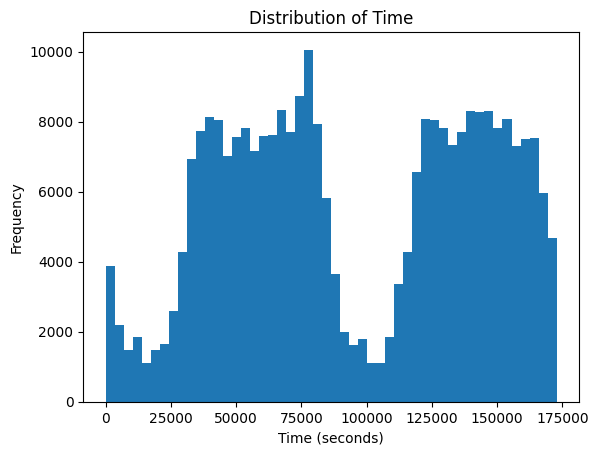

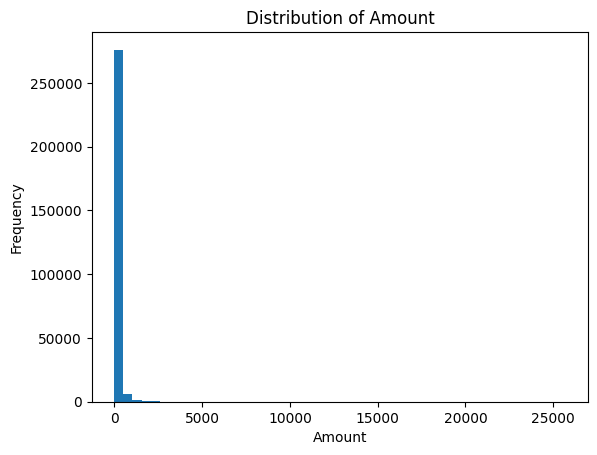

In [6]:
hist(data['Time'], bins=50)
title("Distribution of Time")
xlabel("Time (seconds)")
ylabel("Frequency")
show()

hist(data['Amount'], bins=50)
title("Distribution of Amount")
xlabel("Amount")
ylabel("Frequency")
show()

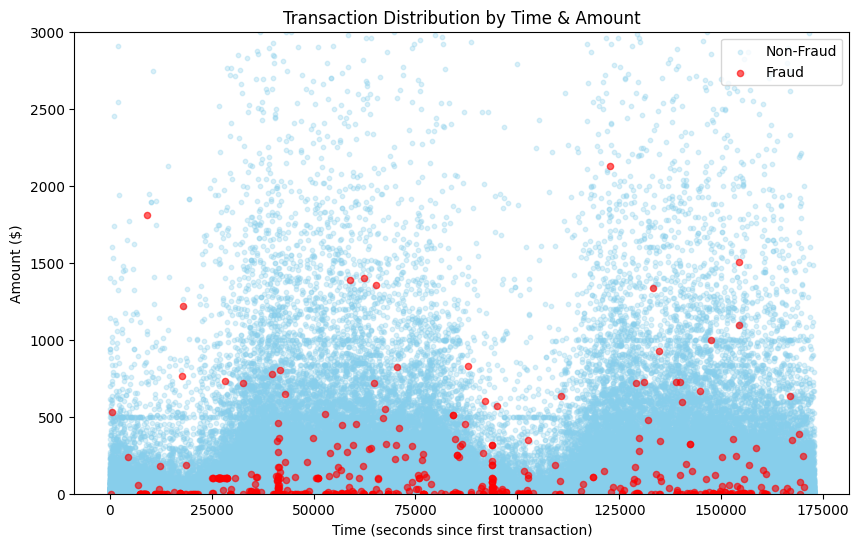

In [7]:
figure(figsize=(10,6))
scatter(data[data['Class']==0]['Time'], 
            data[data['Class']==0]['Amount'], 
            c='skyblue', alpha=0.3, s=10, label="Non-Fraud")

# Fraud
scatter(data[data['Class']==1]['Time'], 
            data[data['Class']==1]['Amount'], 
            c='red', alpha=0.6, s=20, label="Fraud")

title("Transaction Distribution by Time & Amount")
xlabel("Time (seconds since first transaction)")
ylabel("Amount ($)")
legend(loc="upper right")
ylim(0, 3000) 
show()

In [8]:
X = data.drop(columns=['Class'],axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Fraud ratio in train:", y_train.mean())

Train shape: (227845, 30)  Test shape: (56962, 30)
Fraud ratio in train: 0.001729245759178389


In [9]:
X[['Amount','Time']] = StandardScaler().fit_transform(X[['Amount','Time']])

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import *
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)
X_train , y_train = SMOTE(random_state=42,k_neighbors=5).fit_resample(X_train,y_train)
model1 = LogisticRegression(C=1,random_state=42)
model1.fit(X_train,y_train)

LogisticRegression(C=1, random_state=42)

In [11]:
model1.score(X_train,y_train)

0.9592754497035474

In [12]:
model1.score(X_test,y_test)

0.977329915850333

In [13]:
from sklearn.metrics import *
y_pred = model1.predict(X_test)
print(f'ROC score:{roc_auc_score(y_test,y_pred)}')
print(f'f1_score:{f1_score(y_test,y_pred)}')
print(f'Confusion Matrix:{confusion_matrix(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

ROC score:0.9279399952153339
f1_score:0.11834319526627218
Confusion Matrix:[[83376  1919]
 [   18   130]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [14]:
model2 = XGBClassifier()
model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
print("Traing score:",model2.score(X_train,y_train))
print("Testing Score:",model2.score(X_test,y_test))

Traing score: 0.9999974876896794
Testing Score: 0.9992158515033414


In [ ]:
y_pred = model2.predict(X_test)
print(f'ROC score:{roc_auc_score(y_test,y_pred)}')
print(f'f1_score:{f1_score(y_test,y_pred)}')
print(f'Confusion Matrix:{confusion_matrix(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

ROC score:0.901804270710713
f1_score:0.780327868852459
Confusion Matrix:[[85257    38]
 [   29   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.80      0.78       148

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

